In [3]:
import tensorflow as tf

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow==2.0

In [5]:
print(tf.__version__)
labels = [0,1,2,3,4,5,6,7,8,9]
tf.keras.utils.to_categorical(labels)


2.0.0


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

# STEP 2 : DATA PREPROCESSING

We have to scale x_train and x_test so that all values are in the [0, 1] interval. **Why do we need to scale ?** goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.





In [0]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# STEP 4 : COMPILATION

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL

In [12]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 311us/sample - loss: 2.4954 - accuracy: 0.7486
Epoch 2/5
60000/60000 [==============================] - 16s 261us/sample - loss: 0.5819 - accuracy: 0.8419
Epoch 3/5
60000/60000 [==============================] - 19s 320us/sample - loss: 0.4524 - accuracy: 0.8758
Epoch 4/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.4267 - accuracy: 0.8842
Epoch 5/5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.3843 - accuracy: 0.8953


# STEP 6 : EVALUATE THE TRAINING 

### Now let’s check that the model performs well on the test set, too:

In [13]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/1 - 1s - loss: 0.1813 - accuracy: 0.9370


In [16]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07467894115392118
0.9771


# STEP 7 (optional) : PREDICTION

array([6])

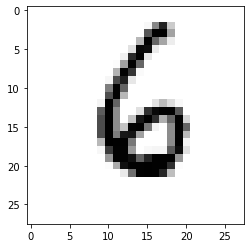

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_test[91],cmap='Greys')
model.predict_classes(x_test[91].reshape(1, 28, 28 ))


In [23]:
model.predict_classes(x_test[7].reshape(1,28,28))

array([9])

In [21]:
y_test[7]

9